In [1]:
from  google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


import the modules

In [3]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

read & show the data

In [4]:
source_folder = '/content/drive/MyDrive/data_parkinson/pd_speech_features.csv'


In [5]:
data = pd.read_csv(source_folder)

In [6]:
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


check the missing values

In [7]:
data.isna().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

Get the features and labels from the dataset. The features are all the columns except ‘status’, and the labels are those in the ‘status’ column

In [8]:
features=data.loc[:,data.columns!='class'].values[:,1:]
labels=data.loc[:,'class'].values

counts of the labels for both 0 and 1

In [9]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])


564 192


Initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them

In [10]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

split the dataset into training and testing sets keeping 20% of the data for testing

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)


Initialize an XGBClassifier and train the model

In [12]:
model=XGBClassifier()
model.fit(x_train,y_train)


XGBClassifier()

generate the predicted values for x_test

In [20]:
y_pred=model.predict(x_test)


calculate and plot the accuracy for the model

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt

In [15]:
def plot_cmat(yte, ypred):
    skplt.plot_confusion_matrix(yte,ypred)
    plt.show()

Accuracy Score: 86.18%

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.62      0.70        40
           1       0.88      0.95      0.91       112

    accuracy                           0.86       152
   macro avg       0.84      0.79      0.81       152
weighted avg       0.86      0.86      0.86       152


Confusion Matrix


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


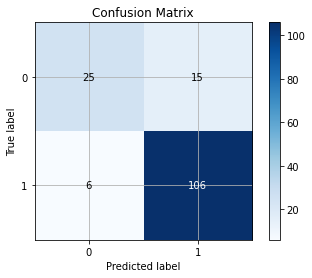

In [19]:
score = accuracy_score(y_test, y_pred)
print("Accuracy Score: %.2f%%" % (score*100))
print("\nClassification Report")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix")
plot_cmat(y_test, y_pred)